# Implement Logistic Regression Algorithm

### 1. Import libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [17]:
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../dataset.csv')

In [3]:
df.head()

,Lương,Thời gian làm việc,Cho vay
0,10,1.0,1
1,5,2.0,1
2,6,1.8,1
3,7,1.0,1
4,8,2.0,1


In [8]:
X = df.drop(columns=['Cho vay'])
y = df['Cho vay']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
y_pred = model.predict(X_test)

In [15]:
y_test

0     1
17    0
15    0
1     1
Name: Cho vay, dtype: int64

In [14]:
y_pred

array([1, 0, 0, 1])

In [19]:
from sklearn.metrics import confusion_matrix

In [21]:
from sklearn.metrics import roc_curve, auc

In [22]:
my_confusion_matrix = confusion_matrix(y_test, y_pred)

In [23]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

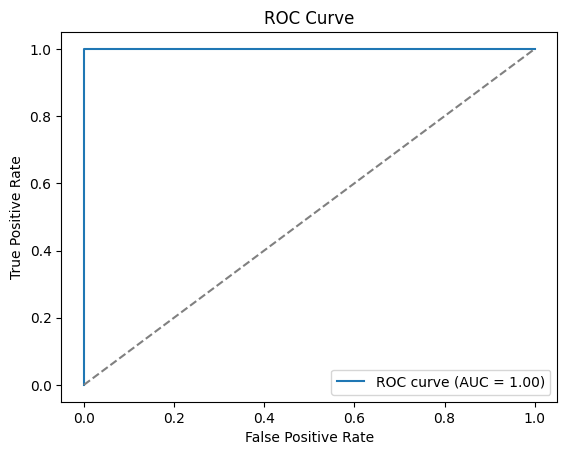

In [24]:

plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [13]:
my_accuracy_score = accuracy_score(y_test, y_pred)
print("My Accuracy Score: ", my_accuracy_score)
my_precision_score = precision_score(y_test, y_pred)
print("My Precision Score: ", my_precision_score)
my_recall_score = recall_score(y_test, y_pred)
print(f"My Recall Score: {my_recall_score}")
my_f1_score = f1_score(y_test, y_pred)
print("My F1 Score: {}".format(my_f1_score))

My Accuracy Score:  1.0
My Precision Score:  1.0
My Recall Score: 1.0
My F1 Score: 1.0


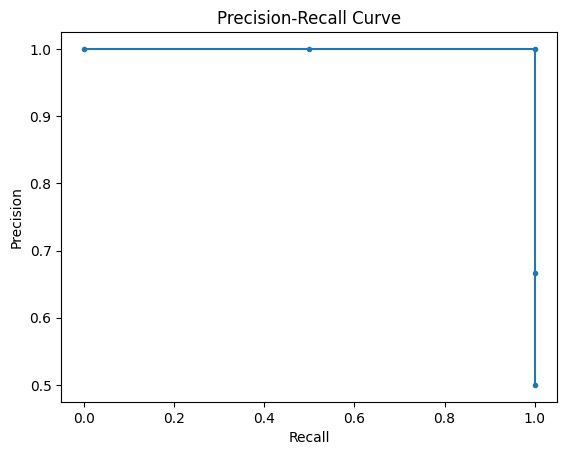

In [25]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

/home/ngocson/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


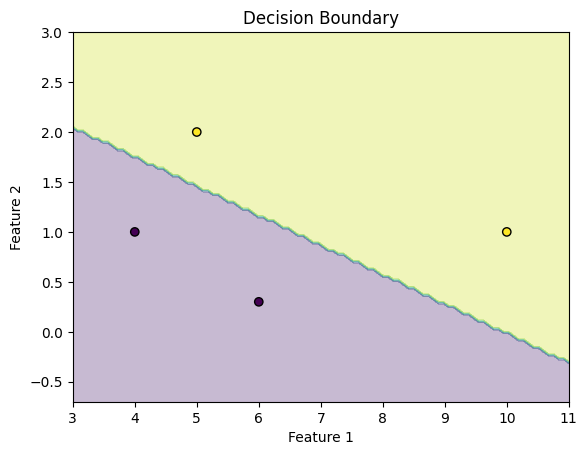

In [27]:
import numpy as np

# Giả sử dữ liệu chỉ có 2 features
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()

# Gọi hàm (chỉ dùng nếu X có 2 features)
plot_decision_boundary(X_test.values, y_test.values, model)
